# 5장. 서포트 벡터 머신

https://nbviewer.jupyter.org/github/rickiepark/handson-ml/tree/master/

이 코드의 내용은 Hands-On Machine Learning with Scikit-Learn & TensorFlow을 참고했음을 밝힙니다.

## 서포트 벡터 머신(SVM, Support Vector Machine)(p201)

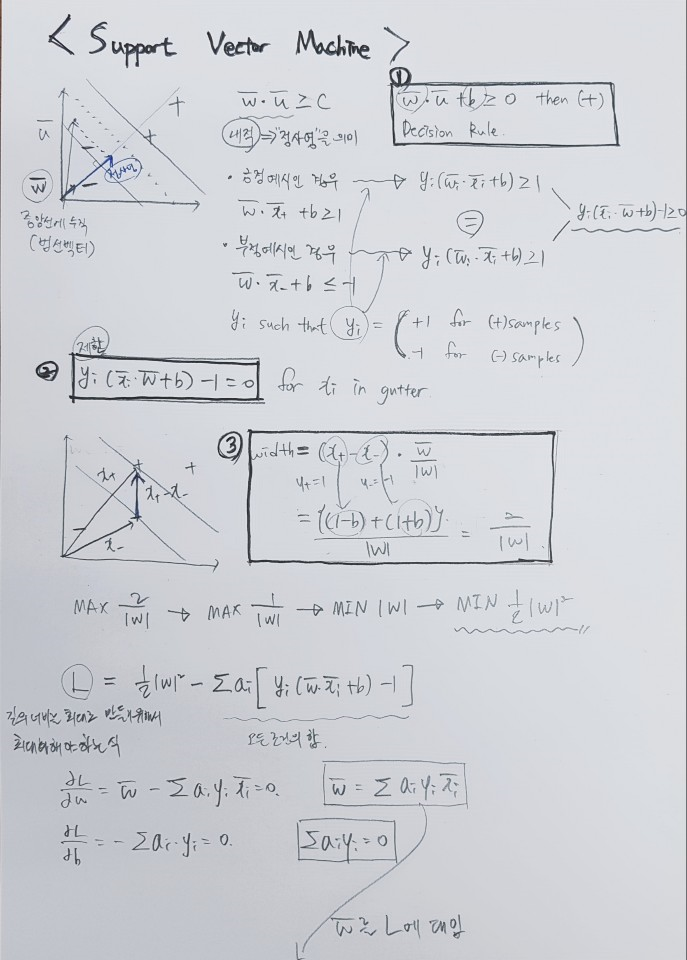

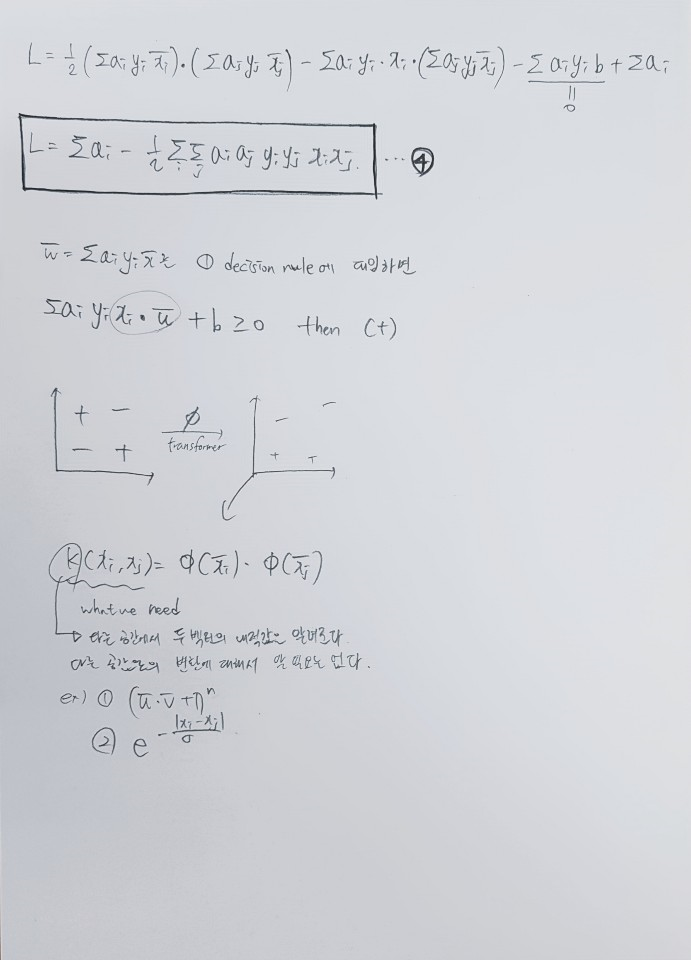

서포트 벡터 머신(SVM)은 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델입니다. 머신러닝에서 가장 인기 있는 모델에 속하고 머신러닝에 관심 있는 사람이라면 반드시 알고 있어야 하는 모델입니다. SVM은 특히 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합합니다.

## 선형 SVM 분류(p201)

* SVM 분류기를 클래스 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각할 수 있습니다. 그래서 라지 마진 분류(large margin classification)라고 합니다.
* 도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않습니다. 도로 경계에 위치한 샘플에 의해 전적으로 결정(또는 의지)됩니다. 이런 샘플을 서포트 벡터(support vector)라고 합니다.

SVM은 특성의 스케일에 민감합니다. 아래 왼쪽 그래프에서는 수직축의 스케일이 수평축의 스케일보다 훨씬 커서 가장 넓은 도로가 거의 수평에 가깝게 됩니다. 특성의 스케일을 조정하면(예를 들면 사이킷런의 StandarScaler를 사용하여) 결졍 경계가 훨씬 좋아집니다(오른쪽 그래프).

하드 마진 분류(hard margin classification) : 모든 샘플이 도로 바깥쪽에 올바르게 분류되도록 하는 모델입니다. 하드 마진 분류에는 두 가지 문제점이 있습니다. 데이터가 선형적으로 구분될 수 있어야 제대로 작동하며, 이상치에 민감합니다. 아래 그림을 보면 붓꽃 데이터셋에 이상치가 하나 있습니다. 왼쪽 그래프에서는 하드 마진을 찾을 수 없습니다. 오른쪽 그래프의 결정 경계는 이상치가 없던 앞의 그림의 결정 경계와 매우 다르고 일반화가 잘될 것 같지 않습니다.

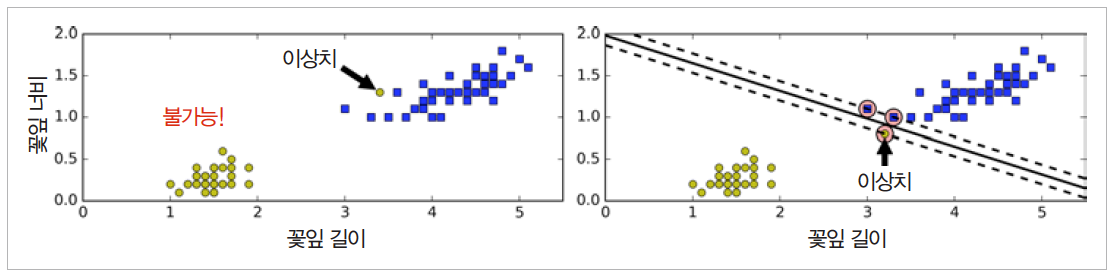

소프트 마진 분류(soft margin classification) : 도로의 폭을 가능한 한 넓게 유지하는 것과 마진 오류(margin violation,즉 샘플이 도로 중간이나 심지어 반대쪽에 있는 경우) 사이에 적절한 균형을 잡아야 합니다. 사이킷런의 SVM 모델에서는 C 하이퍼파라미터를 사용해 이 균형을 조절할 수 있습니다. C 값을 줄이면 도로의 폭이 넓어지지만 마진 오류도 커집니다. 아래 그림은 선형적으로 구분되지 않는 데이터셋에 두 개의 소프트 마진 SVM 분류기로 만든 결정 경계와 마진을 보여줍니다. 왼쪽을 보면 큰 C 값을 사용해 분류기가 마진 오류를 적게 냈지만 마진이 좁아졌습니다. 오른쪽에서는 작은 C 값을 사용해 마진이 넓어졌지만 많은 샘플이 도로 안에 포함되었습니다. 그러나 두 번째 분류기가 더 잘 일반화될 것 같아 보입니다. 사실 대부분의 마진 오류는 결정 경계를 기준으로 올바른 클래스로 분류되기 때문에 이 훈련 세트에서 예측 에러는 마진 오류보다 작습니다. SVM 모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있습니다.

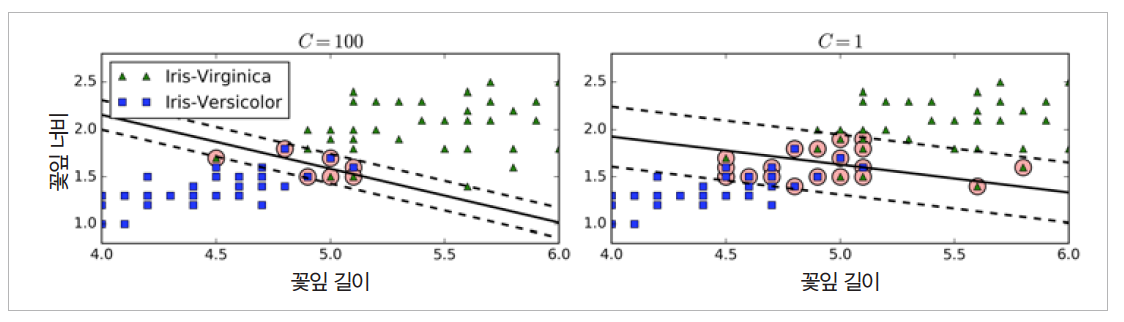

In [2]:
# 붓꽃 데이터를 적재하고, 특성 스케일을 변경하고, Iris-Virginica 품종을 감지하기 위해 선형 SVM 모델을 훈련

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris['target']==2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1,loss='hinge'))
])

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [4]:
# 모델을 사용하여 예측
# SVM 분류기는 로지스틱 회귀 분류기와는 다르게 클래스에 대한 확률을 제공하지 않습니다.
# 사이킷런의 LinearSVC는 predict_proba() 메서드를 제공하지 않지만, SVC 모델은 probability=True로 매개변수를 지정하면 predict_proba() 메서드를 지정합니다.
# SVC의 probability 매개변수 기본값은 False입니다.

svm_clf.predict([[5.5, 1.7]])

array([1.])

LinearSVC는 규제에 편향을 포함시킵니다. 그래서 훈련 세트에서 평균을 빼서 중앙에 맞춰야 합니다. StandardScaler를 사용하여 데이터 스케일을 맞추면 자동으로 이렇게 됩니다. 그리고 loss 매개변수를 'hinge'로 지정해야 합니다. 마지막으로 훈련 샘플보다 특성이 많지 않다면 성능을 높이기 위해 dual 매개변수를 False로 지정해야 합니다.

* 다른 방법으로는 SVC(kernal='linear', C=1)과 같이 SVC 모델을 사용할 수 있습니다. 하지만 큰 훈련 세트에서는 속도가 매우 느리므로 권장하지 않습니다.
* 또 다른 방법은 SGDClassifier(loss='hinge', alpha=1/(m\*C))와 같이 SGDClassifier 모델을 사용하는 것입니다(이 식에서 m은 샘플 수입니다. 확률적 경사 하강법은 샘플 하나씩 그래디언트를 계산하여 모델 파라미터를 갱신하기 때문에 훈련 세트 수에 반비례해야 비슷한 규제를 적용할 수 있습니다).이는 선형 SVM 분류기를 훈련하기 위해 일반적인 확률적 경사 하강법을 적용합니다. LinearSVM만큼 빠르게 수렴하지는 않지만 데이터셋이 아주 커서 메모리에 적재할 수 없거나(외부 메모리 훈련), 온라인 학습으로 분류 문제를 다룰 때는 유용합니다.

## 비선형 SVM 분류(p205)

선형 SVM 분류기가 효율적이고 많은 경우에 아주 잘 작동하지만, 선형적으로 분류할 수 없는 데이터셋이 많습니다. 비선형 데이터셋을 다루는 한 가지 방법은 다항 특성과 같은 특성을 추가하는 것입니다. 이렇게 하면 선형적으로 구분되는 데이터셋이 만들어질 수 있습니다. 아래 그림의 왼쪽 그래프는 하나의 특성 x1만을 가진 간단한 데이터셋을 나타냅니다. 그림에서 볼 수 있듯이 이 데이터셋은 선형적으로 구분이 안 됩니다. 하지만 두 번째 특성 x2 = (x1)\*\*2을 추가하여 만들어진 2차원 데이터셋은 완벽하기 선형적으로 구분할 수 있습니다. 사이킷런을 사용하여 이를 구현하려면 PolynomialFeatures 변환기와 StandardScaler, LinearSVC를 연결하여 Pipeline을 만들면 좋습니다.

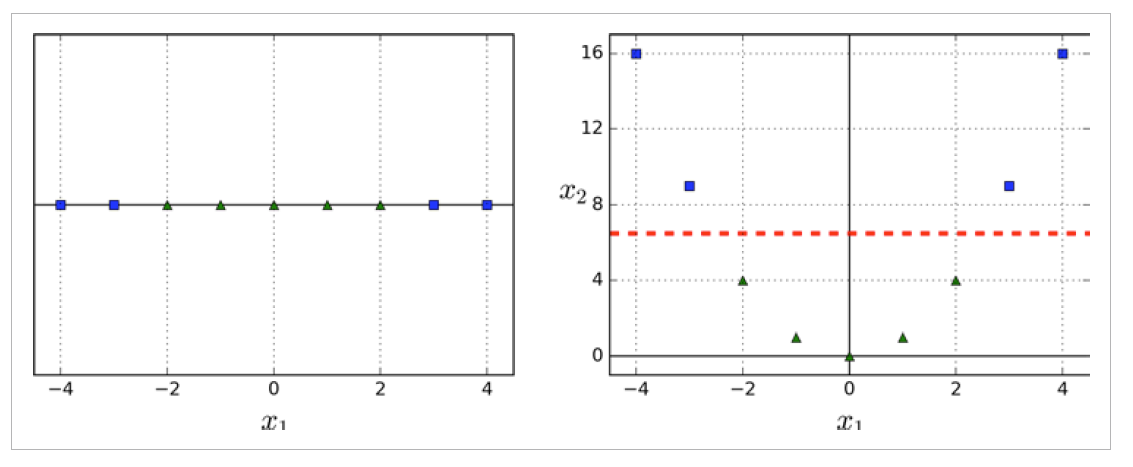

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

## 다항식 커널(p207)

다항식 특성을 추가하는 것은 간단하고(SVM뿐만 아니라) 모든 머신러닝 알고리즘에서 잘 작동합니다. 하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 만듭니다. 다행히도 SVM을 사용할 땐 커널 트릭(kernel trick)이라는 거의 기적에 가까운 수학적 기교를 적용할 수 있습니다. 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있습니다. 사실 어떤 특성도 추가하지 않기 때문에 엄청난 수의 특성 조합이 생기지 않습니다. 이 기법은 SVC 파이썬 클래스에 구현되어 있습니다.

In [6]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly',degree=3,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

아래 그림의 왼쪽 그래프는 3차 다항식 커널을 사용한 SVM 분류기입니다. 오른쪽 그래프는 10차 다항식 커널을 사용한 또 다른 SVM 분류기입니다. 모델이 과대적합이라면 다항식의 차수를 줄여야 합니다. 반대로 과소적합이라면 차수를 늘려야 합니다. 매개변수 coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절합니다. 다항식 커널은 차수가 높아질수록 1보다 작은 값과 1보다 큰 값의 차이가 크게 벌어지므로 coef0를 적절한 값으로 지정하면 고차항의 영향을 줄일 수 있습니다. coef0의 기본값은 0입니다.
* 적절한 하이퍼파라미터를 찾는 일반적인 방법은 그리드 탐색을 사용하는 것입니다. 처음에는 그리드의 폭을 크게 하여 빠르게 검색하고, 그다음에는 최적의 값을 찾기 위해 그리드를 세밀하게 검색해야 합니다. 하이퍼파라미터의 역할을 잘 알고 있으면 파라미터 공간에서 올바른 지역을 탐색하는 데 도움이 됩니다.

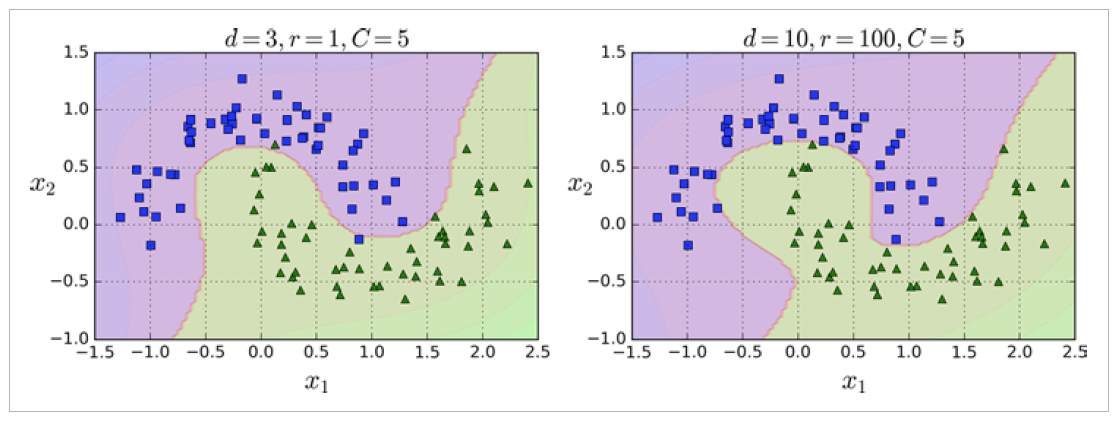

## 유사도 특성 추가(p208)

비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 랜드마크(landmark)와 얼마나 닮았는지 측정하는 유사도 함수(similarity function)로 계산한 특성을 추가하는 것입니다. 예를 들어 앞에서 본 1차원 데이터셋에 두 개의 랜드마크 x1=-2와 x1=1을 추가합시다(아래 그림의 왼쪽 그래프). 그리고 r=0.3인 가우시안 방사 기저 함수(RBF, Radical Basis Function)를 유사도 함수로 정의하겠습니다.  
  
이 함수의 값은 0(랜드마크에서 아주 멀리 떨어진 경우)부터 1(랜드마크와 같은 위치일 경우)까지 변화하며 종 모양으로 나타납니다. 위 식의 b가 랜드마크 지점입니다. r은 0보다 커야 하며 값이 작을수록 폭이 넓은 종 모양으로 됩니다. 이제 새로운 특성을 만들 준비가 되었습니다. 예를 들어 x1=-1 샘플을 살펴봅시다. 이 샘플은 첫 번째 랜드마크에서 1만큼 떨어져 있고 두 번째 랜드마크에서 2만큼 떨어져 있습니다. 그러므로 새로 만든 특성은 x2=exp(-0.3\*(1\*\*2))=0.74와 x3=exp(-0.3\*(2\*\*2)=0.30입니다. 아래 그림의 오른쪽 그래프는 변환된 데이터셋을 보여줍니다(원본 특성은 뺏습니다). 그림에서 볼 수 있듯이 이제 선형적으로 구분이 가능합니다.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib 한글 설정
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"유사도", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

랜드마크를 어떻게 선택하는지 궁금할 것입니다. 간단한 방법은 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정하는 것입니다. 이렇게 하면 차원이 매우 커지고 따라서 변환된 훈련 세트가 선형적으로 구분될 가능성이 높습니다. 단점은 훈련 세트에 있는 n개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 m개의 샘플로 변환된다는 것입니다(원본 특성은 제외한다고 가정합니다). 훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성이 만들어집니다.

## 가우시안 RBF 커널(p209)

다항 특성 방식과 마찬가지로 유사도 특성 방식도 머신러닝 알고리즘에 유용하게 사용될 수 있습니다. 추가 특성을 모두 계산하려면 연산 비용이 많이 드는데 특히 훈련 세트가 클 경우 더 그렇습니다. 하지만 커널 트릭이 한 번 더 SVM의 마법을 만듭니다. 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 실제로 특성을 추가하지 않고 얻을 수 있습니다. SVC 모델에 가우시안 RBF 커널을 적용해보겠습니다.

In [14]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf',gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

위 코드 모델이 위 그림의 왼쪽 아래에 나타나 있습니다. 다른 그래프들은 하이퍼파라미터 gamma(r)와 C를 바꾸어서 훈련시킨 모델입니다. gamma를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아집니다. 결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어집니다. 반대로 작은 gamma 값은 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워집니다. 결국 하이퍼파라미터 r가 규제의 역할을 합니다. 모델이 과대적합일 경우엔 감소시켜야 하고 과소적합일 경우엔 증가시켜야 합니다(하이퍼파라미터 C와 비슷합니다).

여러 가지 커널 중 어떤 것을 사용해야 할까요? 경험적으로 봤을 때 언제나 선형 커널을 가장 먼저 시도해봐야 합니다(LinearSVC가 SVC(kernel='linear')보다 훨씬 빠르다는 것을 기억하세요). 특히 훈련 세트가 아주 크거나 특성 수가 많을 경우에 그렇습니다. 훈련 세트가 너무 크지 않다면 가우시안 RBF 커널을 시도해보면 좋습니다. 대부분의 경우 이 커널이 잘 들어맞습니다. 시간과 컴퓨팅 성능이 충분하다면(특히 훈련 데이터의 구조에 특화된 커널이 있는 경우) 교차 검증과 그리드 탐색을 사용해 다른 커널을 좀 더 시도해볼 수 있습니다.

## 계산 복잡도(p211)

* LinearSVC 파이썬 클래스는 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 합니다. 이 라이브러리는 커널 트릭을 지원하지 않지만 훈련 샘플과 특성 수에 거의 선형적으로 늘어납니다. 이 알고리즘의 훈련 시간 복잡도는 대략 O(m\*n) 정도입니다.
* 정밀도를 높이면 알고리즘의 수행 기간이 길어집니다. 이는 허용오차 하이퍼파라미터 e로 조절합니다(사이킷런에서는 매개변수 tol입니다). 대부분의 분류 문제를 허용오차를 기본값으로 두면 잘 작동합니다.
* SVC는 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 합니다. 훈련의 시간 복잡도는 보통 O((m\*\*2)\*n)과 O((m\*\*3)\*n)의 사이입니다. 불행하게도 이는 훈련 샘플 수가 커지면(예를 들면 수십만 개 샘플) 엄청나게 느려진다는 것을 의미합니다. 복잡하지만 작거나 중간 규모의 훈련 세트에 이 알고리즘이 잘 맞습니다. 하지만 특성의 개수에는, 특히 희소 특성(sparse features, 즉 각 샘플에 0이 아닌 특성이 몇 개 없는 경우)인 경우에는 잘 확장됩니다. 이런 경우 알고리즘의 성능이 샘플이 가진 0이 아닌 특성의 평균 수에 거의 비례합니다.

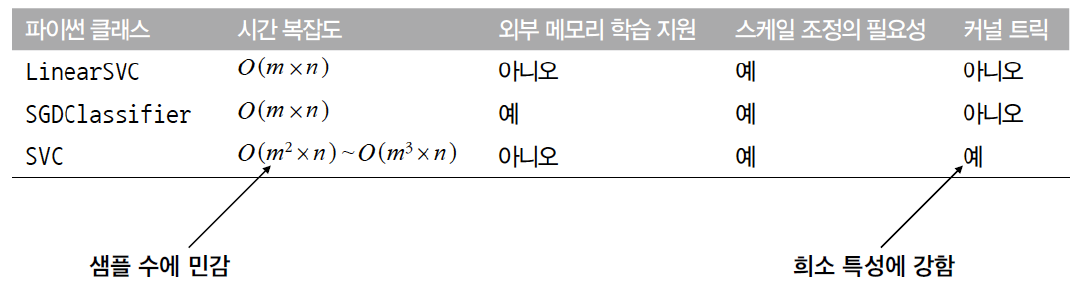

## SVM 회귀(p212)

앞서 이야기한 것처럼 SVM 알고리즘은 다목적으로 사용할 수 있습니다. 선형, 비선형 분류뿐만 아니라 선형, 비선형 회귀에도 사용할 수 있습니다. 회귀에 적용하는 방법은 목표를 반대로 하는 것입니다. 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신, SVM 회귀는 제한된 마진 오류(즉, 도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습합니다. 도로의 폭은 하이퍼파라미터 e로 조절합니다. 아래 그림은 무작위로 생성한 선형 데이터셋에 훈련시킨 두 개의 선형 SVM 회귀 모델을 보여줍니다. 하나는 마진을 크게(e=1.5) 하고 다른 하나는 마진을 작게(e=0.5) 하여 만들었습니다.  
마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없습니다. 그래서 이 모델을 e에 민감하지 않다(e-insensitive)고 말합니다.

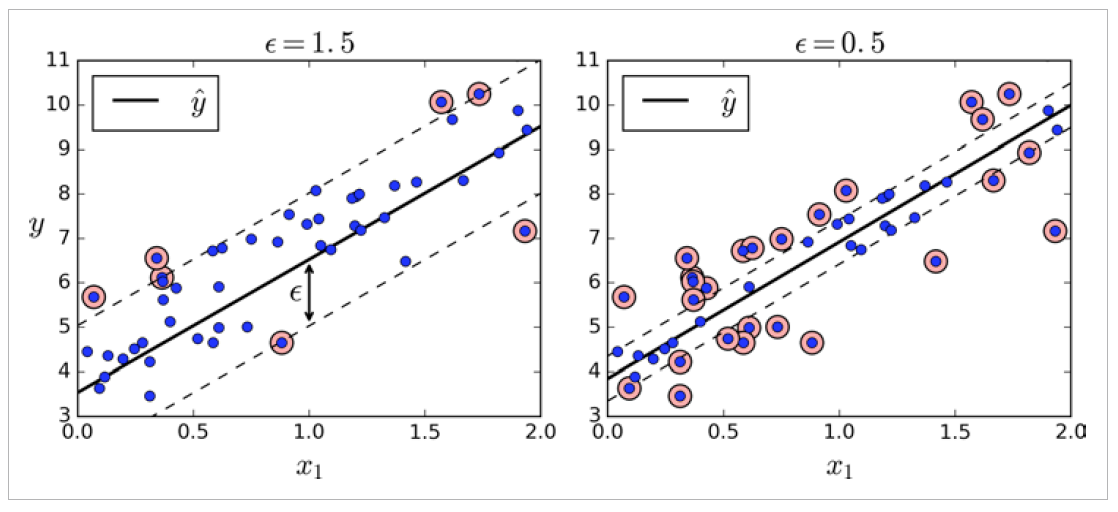

In [15]:
# LinearSVR은 LinearSSVC의 회귀 버전입니다.
# LinearSVR은 (LinearSVC처럼) 필요한 시간이 훈련 세트의 크기에 비례해서 선형적으로 늘어납니다.
# 먼저 훈련 데이터의 스케일을 맞추고 평균을 0으로 맞춰야 합니다.

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

비선형 회귀 작업을 처리하려면 커널 SVM 모델을 사용합니다. 예를 들어 아래 그림은 임의의 2차방정식 형태의 훈련 세트에 2차 다항 커널을 사용한 SVM 회귀를 보여줍니다. 왼쪽 그래프는 규제가 거의 없고(즉, 아주 큰 C), 오른쪽 그래프는 규제가 훨씬 많습니다(즉, 작은 C).

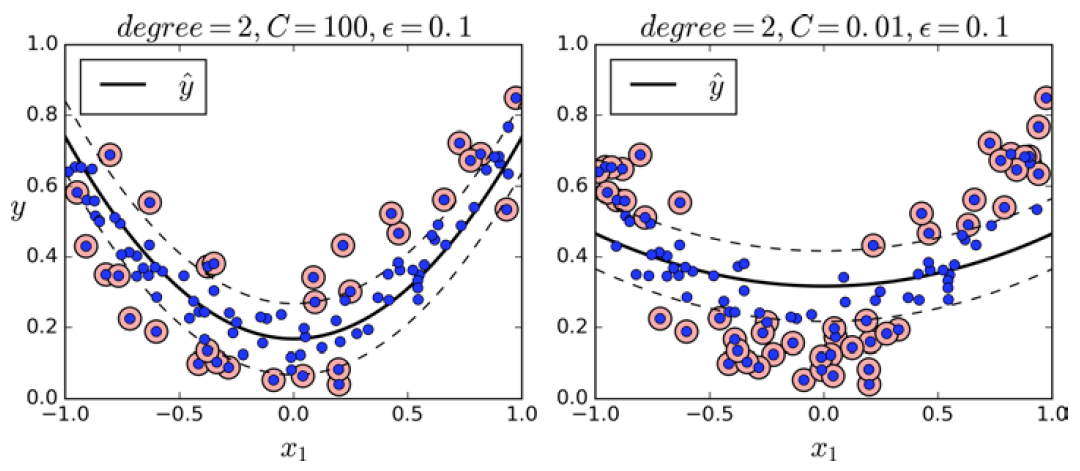

In [16]:
# SVR은 SVC의 회귀 버전입니다.
# SVR은 (SVC처럼) 훈련 세트가 커지면 훨씬 느려집니다.

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## SVM 이론(p214)

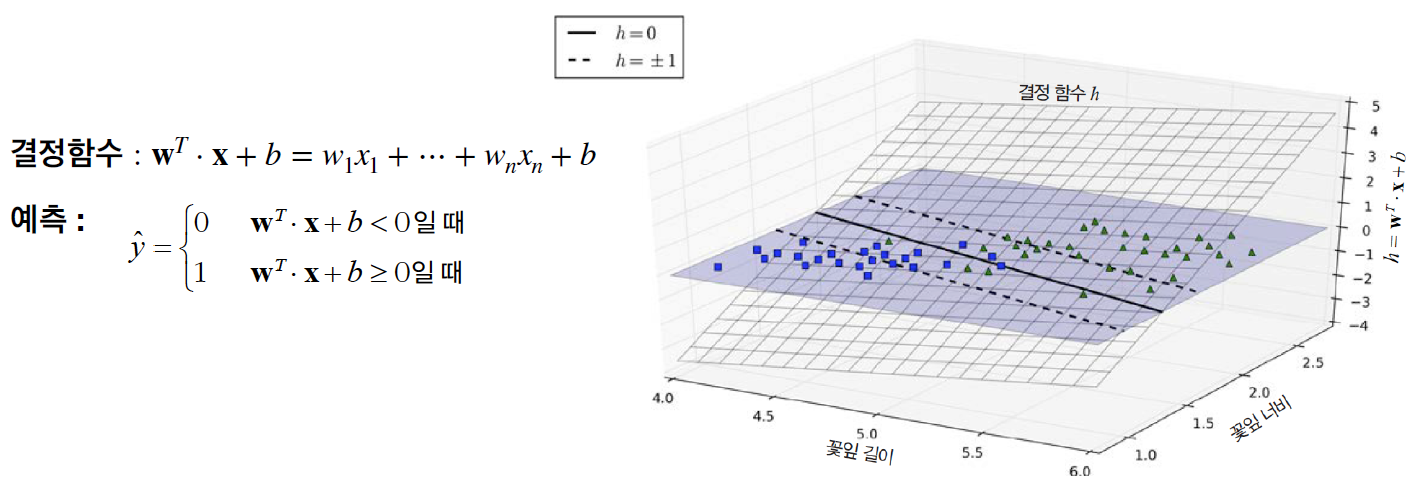  
특성이 두 개(꽃잎의 너비와 길이)인 데이터셋이기 때문에 2차원 평면입니다. 결정 경계는 결정 함수의 값이 0인 점들로 이루어져 있습니다. 이는 두 평면의 교차점으로 직선입니다(굵은 실선으로 나타냈습니다). 점선은 결정 함수의 값이 1 또는 -1인 점들을 나타냅니다. 이 선분은 결정 경계에 나란하고 일정한 거리만큼 떨어져서 마진을 형성하고 있습니다. 선형 SVM 분류기를 훈련한다는 것은 마진 오류를 하나도 발생하지 않거나(하드 마진) 제한적인 마진 오류를 가지면서(소프트 마진) 가능한 한 마진을 크게 하는 w와 b를 찾는 것입니다.

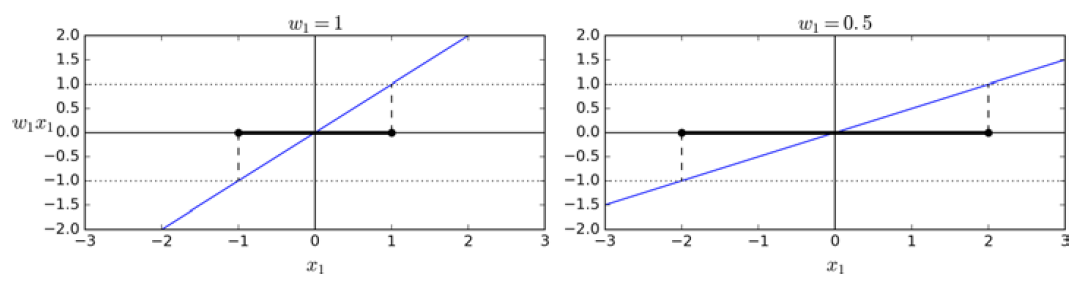  
결정 함수의 기울기를 생각해보면 이는 가중치 벡터 |w|의 노름과 같습니다. 이 기울기를 2로 나누면 결정 함수의 값이 +-1이 되는 점들이 결정 경계로부터 2배 만큼 더 멀어집니다. 즉, 기울기를 2로 나누는 것은 마진에 2를 곱하는 것과 같습니다. 가중치 벡터 w가 작을수록 마진은 커집니다.

Question 215 결정함수의 기울기를 생각해보면~

마진을 크게 하기 위해 |w|를 최소화하려고 합니다. 그러나 마진 오류를 하나도 만들지 않으려면(하드 마진), 결정 함수가 모든 양성 훈련 샘플에서는 1보다 커야 하고 음성 훈련 샘플에서는 -1보다 작아야 합니다. 음성 샘플(y(i)=0)일 때 t(i)=-1로, 양성 샘플(y(i)=1)일 때 t(i)=1로 정의하면 앞서 말한 제약 조건을 모든 샘플에서 아래와 같이 표현할 수 있습니다. 그러므로 하드 마진 선형 SVM 분류기의 목적함수를 제약이 있는 최적화(constrained optimization) 문제로 표현할 수 있습니다.  
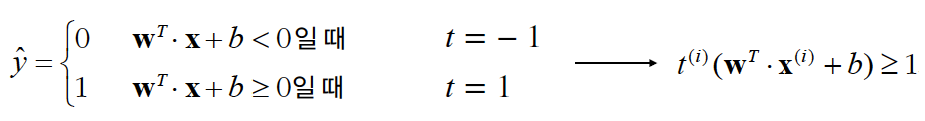

  
|w|를 최소화하는 대신 1/2\*(|w|\*\*2)을 최소화합니다. 같은 결과를 내지만(어떤 값을 최소화하는 w와 b는 그 값을 제곱하여 2로 나눈 것도 최소화합니다) 1/2\*(|w|\*\*2)이 깔끔하고 간단하게 미분됩니다(미분 결과는 w입니다). 반면 |w|는 w=0에서 미분할 수 없습니다. 최적화 알고리즘은 미분할 수 있는 함수에서 잘 작동합니다.

소프트 마진 분류기의 목적 함수를 구성하려면 각 샘플에 대해 슬랙 변수(slack variable) c(i)>=0을 도입해야 합니다. c(i)는 i번째 샘플이 얼마나 마진을 위반할지 정합니다. 이 문제는 두 개의 상충되는 목표를 가지고 있습니다. 마진 오류를 최소화하기 위해 가능한 한 슬랙 변수의 값을 작게 만드는 것과 마진을 크게 하기 위해 1/2\*(w\*\*T)\*w를 가능한 한 작게 만드는 것입니다. 여기에 하이퍼파라미터 C가 등장합니다. 이 파라미터는 두 목표 사이의 트레이드오프를 정의합니다.  


## 콰드라틱 프로그래밍(p217)

하드 마진과 소프트 마진 문제는 모두 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제입니다. 이런 문제를 콰드라틱 프로그래밍(Quadratic Programming, QP) 문제라고 합니다. 여러 가지 테크닉으로 QP 문제를 푸는 알고리즘이 많이 있지만 이 책의 범위를 벗어납니다. 일반적인 문제 공식은 아래와 같습니다.  
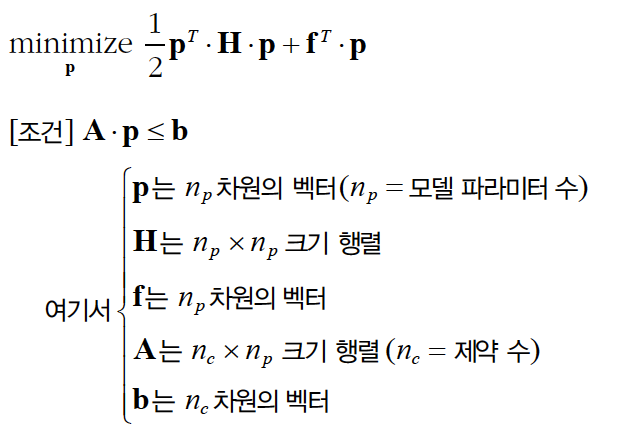  
다음과 같이 QP 파라미터를 지정하면 하드 마진을 갖는 선형 SVM 분류기의 목적 함수를 간단하게 검증할 수 있습니다.
* np = n+1, 여기서 n은 특성 수입니다(편향 때문에 +1이 추가되었습니다).
* nc = m, 여기서 n은 훈련 샘플 수입니다.
* H는 np\*np 크기이고 왼쪽 맨 위의 원소가 0(편향을 제외하기 위해)인 것을 제외하고는 단위행렬입니다.
* f = 0, 모두 0으로 채워진 np차원의 벡터입니다.
* b = 1, 모두 1로 채워진 nc차원의 벡터입니다.
* a(i) = -t(i)\*x(i), 여기서 x(i)는 편향을 위해 특성 x0 = 1을 추가한 x(i)와 같습니다.

## 쌍대 문제(p218)

원 문제(primal problem)라는 제약이 있는 최적화 문제가 주어지면 쌍대 문제(dual problem)라고 하는 깊게 관련된 다른 문제로 표현할 수 있습니다. 일반적으로 쌍대 문제 해는 원 문제 해의 하한값이지만, 어떤 조건 하에서는 원 문제와 똑같은 해를 제공합니다. 다행히도 SVM 문제는 이 조건을 만족시킵니다(목적 함수가 볼록 함수이고, 부등식 제약 조건이 연속 미분 가능하면서 볼록 함수입니다). 따라서 원 문제 또는 쌍대 문제 중 하나를 선택하여 풀 수 있습니다(LinearSVC, LinearSVR의 매개변수 dual의 기본값 True를 False로 바꾸면 원 문제를 선택합니다. SVC, SVR은 쌍대 문제만을 풉니다). 둘 다 같은 해를 제공합니다. 아래 식이 선형 SVM 목적 함수의 쌍대 형식입니다.  
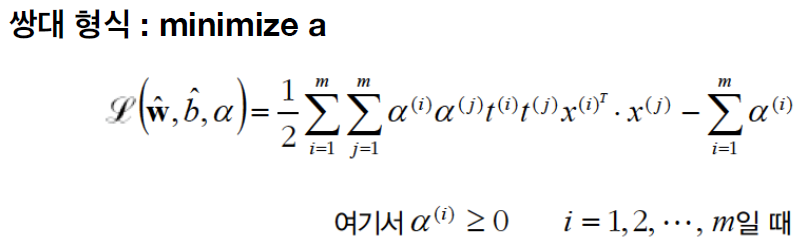  
훈련 샘플 수가 특성 개수보다 작을 때 원 문제보다 쌍대 문제를 푸는 것이 더 빠릅니다. 더 중요한 것은 원 문제에서는 적용이 안 되는 커널 트릭을 가능하게 합니다.

## 커널 SVM(p219)

(moons 데이터셋 같은) 2차원 데이터셋에 2차 다항식 변환을 적용하고 선형 SVM 분류기를 변환된 이 훈련 세트에 적용한다고 합시다. 아래 식은 우리가 적용하고자 하는 2차 다항식 매핑 함수입니다.  
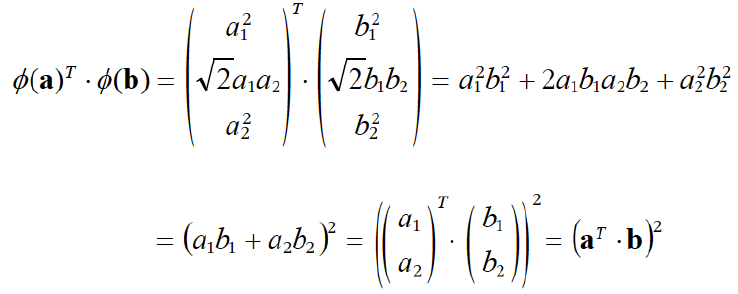  
변환된 벡터는 2차원이 아니고 3차원이 됩니다. 두 개의 2차원 벡터 a와 b에 2차 다항식 매핑을 적용한 다음 변환된 벡터로 점곱(dot product)을 하면 어떻게 되는지 살펴봅시다.  
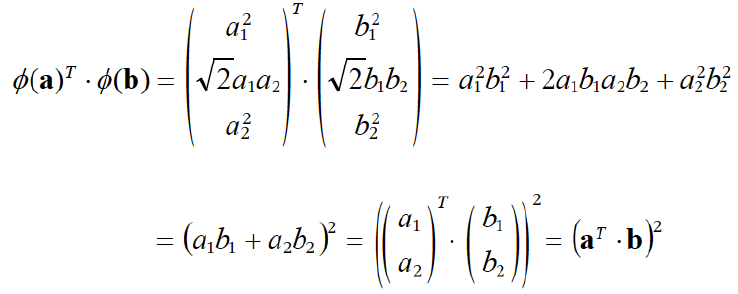  
변환된 벡터의 점곱이 원래 벡터의 점곱의 제곱과 같습니다(2차 다항식 커널).  
핵심은 다음과 같습니다. 모든 훈련 샘플에 변환 φ를 적용하면 쌍대 문제에 점곱이 포함될 것입니다. 하지만 φ가 2차 다항식 변환이라면 변환된 벡터의 점곱을 간단하게 바꿀 수 있습니다. 그래서 실제로 훈련 샘플을 변환할 필요가 전혀 없습니다. 즉, 쌍대 문제에 있는 식의 점곱을 제곱으로 바꾸기만 하면 됩니다. 결괏값은 실제로 훈련 샘플을 어렵게 변환해서 선형 SVM 알고리즘을 적용하는 것과 완전히 같습니다. 하지만 이 기법이 전체 과정에 필요한 계산량 측면에서 훨씬 효율적입니다. 바로 이것이 커널 트릭입니다.

커널 SVM으로 예측하기  
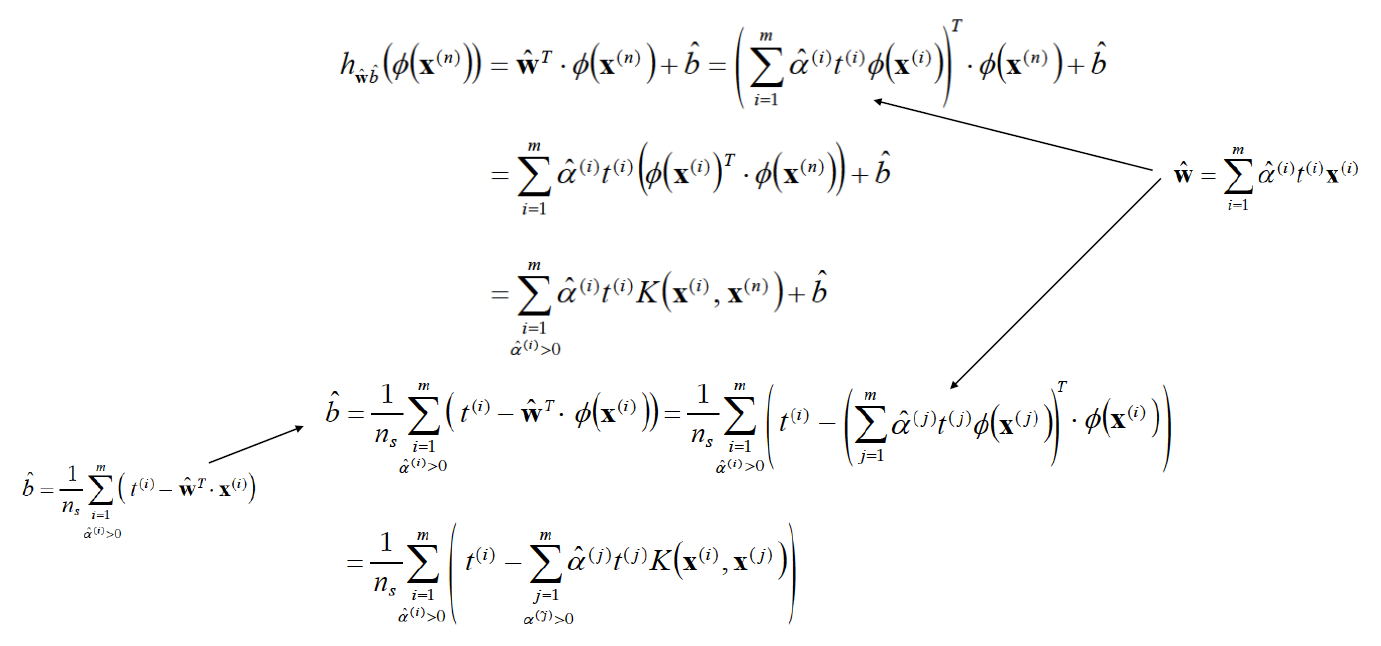

## 연습문제(p223)

#### 1. 서포트 벡터 머신의 근본 아이디어는 무엇인가요?  
서포트 벡터 머신(SVM)의 근본적인 아이디어는 클래스 사이에 가능한 한 가장 넓은 '도로'를 내는 것입니다. 다시 말해 두 클래스를 구분하는 결정 경계와 샘플 사이의 마진을 가능한 한 가장 크게 하는 것이 목적입니다. 소프트 마진 분류를 수행할 때는 SVM이 두 클래스를 완벽하게 나누는 것과 가장 넓은 도로를 만드는 것 사이에 절충안을 찾습니다(즉, 몇 개의 샘플은 도로 안에 놓일 수 있습니다). 또 하나의 핵심적인 아이디어는 비선형 데이터셋에서 훈련할 때 커널 함수를 사용하는 것입니다.
<br><br>

#### 2. 서포트 벡터가 무엇인가요?  
서포트 벡터는 SVM이 훈련된 후에 경계를 포함해 도로에 놓인 어떤 샘플입니다. 결정 경계는 전적으로 서포트 벡터에 의해 결정됩니다. 서포트 벡터가 아닌(즉, 도로 밖에 있는) 어떤 샘플도 영향을 주지 못합니다. 이런 샘플은 삭제하고 다른 샘플을 더 추가하거나, 다른 곳으로 이동시킬 수 있습니다. 샘플이 도로 밖에 있는 한 결정 경계에 영향을 주지 못할 것입니다. 예측을 계산할 때는 전체 훈련 세트가 아니라 서포트 벡터만 관여됩니다.
<br><br>

#### 3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?  
SVM은 클래스 사이에 가능한 한 가장 큰 도로를 내는 것이므로 훈련 세트의 스케일이 맞지 않으면 크기가 작은 특성을 무시하는 경향이 있습니다.
<br><br>

#### 4. SVM 분류기가 샘플을 분류할 때 신뢰도 점수와 확률을 출력할 수 있나요?  
SVM 분류기는 테스트 샘플과 결정 경계 사이의 거리를 출력할 수 있으므로 이를 신뢰도 점수로 사용할 수 있습니다. 그러나 이 점수를 클래스 확률의 추정값으로 바로 변환할 수는 없습니다. 사이킷런에서 SVM 모델을 만들 때 probability=True로 설정하면 훈련이 끝난 후 (훈련 데이터에 5-겹 교차 검증을 사용하여 추가로 훈련시킨) SVM의 점수에 로지스틱 회귀를 훈련시켜 확률을 계산합니다. 이 설정은 SVM 모델에 predict_proba()와 predict_log_proba() 메서드를 추가시킵니다.
<br><br>

#### 5. 수백만 개의 샘플과 수백 개의 특성을 가진 훈련 세트에 SVM 모델을 훈련시키려면 원 문제와 쌍대 문제 중 어떤 것을 사용해야 하나요?  
커널 SVM은 쌍대 형식만 사용할 수 있기 때문에 이 질문은 선형 SVM에만 해당합니다. 원 문제의 계산 복잡도는 훈련 샘플 수 m에 비례하지만, 쌍대 형식의 계산 복잡도는 m\*\*2과 m\*\*3사이의 값에 비례합니다. 그러므로 수백만 개의 샘플이 있다면 쌍대 형식은 너무 느려질 것이므로 원 문제를 사용해야 합니다.
<br><br>

#### 6. RBF 커널을 사용해 SVM 분류기를 훈련시켰더니 훈련 세트에 과소적합된 것 같습니다. r(gamma)를 증가시켜야 할까요, 감소시켜야 할까요? C의 경우는 어떤가요?  
RBF 커널에 훈련된 SVM 분류기가 훈련 세트에 과소적합이라면 규제가 너무 큰 것일 수 있습니다. 규제를 줄이려면 gamma나 C(또는 둘 다) 값을 증가시켜야 합니다.
<br><br>

#### 7. 이미 만들어진 QP 알고리즘 라이브러리를 사용해 소프트 마진 선형 SVM 분류기를 학습시키려면 QP 매개변수 (H,f,A,b)를 어떻게 지정해야 하나요?  
p601